### Import Libraries

In [2]:
import numpy as np 
import random  
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")

In [3]:
url="https://drive.google.com/file/d/17H1EjpiedjhMrKf4lsdvn82wRQXm231c/view?usp=sharing"
data= pd.read_csv("ConsolidateOutput.csv")

### Data Cleaning

In [4]:
data.shape

(2973371, 15)

In [5]:
# Checking Type of each field 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973371 entries, 0 to 2973370
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   external_author_id  float64
 1   author              object 
 2   content             object 
 3   region              object 
 4   language            object 
 5   publish_date        object 
 6   harvested_date      object 
 7   following           int64  
 8   followers           int64  
 9   updates             int64  
 10  post_type           object 
 11  account_type        object 
 12  new_june_2018       int64  
 13  retweet             int64  
 14  account_category    object 
dtypes: float64(1), int64(5), object(9)
memory usage: 340.3+ MB


In [6]:
# Checking missing Values
data.isna().sum().sort_values(ascending=False)

post_type             1662425
region                   8843
account_type              363
external_author_id          4
content                     1
account_category            0
retweet                     0
new_june_2018               0
updates                     0
followers                   0
following                   0
harvested_date              0
publish_date                0
language                    0
author                      0
dtype: int64

In [7]:
# Removing 1 content row
data.dropna(subset = ['content'], inplace=True)
# Again Checking of missing values
data.isna().sum().sort_values(ascending=False)

post_type             1662424
region                   8843
account_type              363
external_author_id          4
account_category            0
retweet                     0
new_june_2018               0
updates                     0
followers                   0
following                   0
harvested_date              0
publish_date                0
language                    0
content                     0
author                      0
dtype: int64

In [8]:
data.shape

(2973370, 15)

In [9]:
# Dropping un-necessary Columns
df = data.drop(['external_author_id', 'harvested_date'], axis=1)
df.head()

,author,content,region,language,publish_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
0,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,1052,9636,253,NaN,Right,0,0,RightTroll
1,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,1054,9637,254,NaN,Right,0,0,RightTroll
2,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:50,1054,9637,255,RETWEET,Right,0,1,RightTroll
3,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,1062,9642,256,NaN,Right,0,0,RightTroll
4,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,10/1/2017 2:13,1050,9645,246,RETWEET,Right,0,1,RightTroll


In [10]:
# languages of tweets
df.language.value_counts(normalize=True)

English                7.160098e-01
Russian                2.099046e-01
German                 2.931724e-02
Ukrainian              1.323784e-02
Italian                6.139162e-03
Serbian                3.233705e-03
Uzbek                  3.192001e-03
Bulgarian              3.180902e-03
LANGUAGE UNDEFINED     2.799853e-03
Arabic                 2.554341e-03
Macedonian             1.769036e-03
French                 1.537649e-03
Spanish                1.057722e-03
Norwegian              7.573898e-04
Farsi (Persian)        5.666970e-04
Romanian               5.485358e-04
Dutch                  3.924839e-04
Swedish                3.433814e-04
Vietnamese             3.329555e-04
Estonian               2.593017e-04
Japanese               2.576201e-04
Catalan                1.984280e-04
Finnish                1.954012e-04
Albanian               1.923743e-04
Croatian               1.836300e-04
Icelandic              1.678230e-04
Pushto                 1.641235e-04
Portuguese             1.563

In [11]:
# From above we got to know that, 71.6% of tweets are in English
# making a dataframe df which contains only english tweets
df = df.loc[df.language == 'English']
print(df.shape)
df.drop(['language'], axis = 1, inplace = True)
df.head()

(2128962, 13)


,author,content,region,publish_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
0,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,10/1/2017 19:58,1052,9636,253,NaN,Right,0,0,RightTroll
1,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,10/1/2017 22:43,1054,9637,254,NaN,Right,0,0,RightTroll
2,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,10/1/2017 22:50,1054,9637,255,RETWEET,Right,0,1,RightTroll
3,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,10/1/2017 23:52,1062,9642,256,NaN,Right,0,0,RightTroll
4,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,10/1/2017 2:13,1050,9645,246,RETWEET,Right,0,1,RightTroll


In [12]:
# Regions from where tweets were made
df.region.unique()

array(['Unknown', 'United States', 'Italy', nan, 'United Arab Emirates',
       'Israel', 'Azerbaijan', 'United Kingdom', 'Russian Federation',
       'Iraq', 'Germany', 'France', 'Ukraine', 'Serbia', 'Egypt',
       'Hong Kong', 'Belarus', 'Malaysia', 'Afghanistan', 'Mexico',
       'Canada', 'Iran, Islamic Republic of', 'Greece', 'Czech Republic',
       'Finland', 'Latvia', 'Spain', 'Sweden', 'Denmark', 'Switzerland'],
      dtype=object)

In [13]:
# Counting values of Regions
df.region.value_counts(normalize=True)

United States                8.692881e-01
Unknown                      1.160504e-01
United Kingdom               7.831501e-03
Azerbaijan                   3.578315e-03
Germany                      6.039053e-04
Russian Federation           5.385802e-04
Italy                        5.287109e-04
Canada                       2.819791e-04
Belarus                      2.321628e-04
Afghanistan                  2.166540e-04
Iraq                         2.157140e-04
Israel                       1.922158e-04
United Arab Emirates         1.743571e-04
Ukraine                      1.085620e-04
Spain                        3.383750e-05
France                       3.148767e-05
Egypt                        2.772795e-05
Sweden                       2.020850e-05
Mexico                       1.926857e-05
Iran, Islamic Republic of    9.399305e-06
Greece                       6.579513e-06
Finland                      3.759722e-06
Malaysia                     1.879861e-06
Latvia                       1.409

In [14]:
# 87% of tweets were from United States so updating df for United States region only
df = df.loc[df.region == 'United States']
print(df.shape)

(1849686, 12)


In [15]:
# dropping region column
df.drop(['region'], axis = 1, inplace = True)
df.head()

,author,content,publish_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
425,1D_NICOLE_,#FoodPoisoning is not a joke! #Walmart #KochFa...,11/26/2015 22:20,48,40,394,RETWEET,Koch,0,1,Fearmonger
426,1D_NICOLE_,Thanks God that #turkey i ate few days ago was...,11/26/2015 22:35,48,40,395,RETWEET,Koch,0,1,Fearmonger
428,1D_NICOLE_,"who's got the worst make up ever, don't tell m...",5/25/2015 12:38,59,51,352,NaN,Koch,0,0,Fearmonger
429,1D_NICOLE_,"I hurt easy, I just don't show it. You can hur...",5/25/2015 12:38,59,51,354,NaN,Koch,0,0,Fearmonger
430,1D_NICOLE_,« The young are permanently in a state resembl...,5/25/2015 12:39,59,51,356,NaN,Koch,0,0,Fearmonger


In [16]:
#checking for null values
df.isna().sum().sort_values(ascending = False)

post_type           1027093
account_type            354
account_category          0
retweet                   0
new_june_2018             0
updates                   0
followers                 0
following                 0
publish_date              0
content                   0
author                    0
dtype: int64

In [17]:
# unique values for account_type column
df.account_type.unique()

array(['Koch', 'Right', 'left', 'Russian', '?', 'Hashtager', 'Arabic',
       'Commercial', 'local', 'German', 'ZAPOROSHIA', 'news', 'right',
       'Ebola ', nan, 'French'], dtype=object)

Now, we will be replacing:
- 'right' with 'Right'
- 'left' with 'Left'
- '?' with 'Unknown'
- 'local' with 'Local'
- 'news' with 'News'
- 'ZAPOROSHIA' with 'Zaporoshia'

In [18]:
# replacing values
df['account_type'].fillna(value='Unknown', inplace = True)

df['account_type'].replace({'?': 'Unknown', 'right': 'Right','left': 'Left', 'news': 'News', 
                           'local': 'Local', 'ZAPOROSHIA': 'Zaporoshia'},inplace = True)
df.account_type.unique()

array(['Koch', 'Right', 'Left', 'Russian', 'Unknown', 'Hashtager',
       'Arabic', 'Commercial', 'Local', 'German', 'Zaporoshia', 'News',
       'Ebola ', 'French'], dtype=object)

In [19]:
df.isna().sum().sort_values(ascending = False)

post_type           1027093
account_category          0
retweet                   0
new_june_2018             0
account_type              0
updates                   0
followers                 0
following                 0
publish_date              0
content                   0
author                    0
dtype: int64

In [20]:
df.post_type.unique()

array(['RETWEET', nan, 'QUOTE_TWEET'], dtype=object)

In [21]:
# Replace 'nan' with 'no_action' i.e neither 'retweeted' nor 'quote_tweet'
df['post_type'].fillna(value='NO_ACTION', inplace = True)
df.post_type.unique()

array(['RETWEET', 'NO_ACTION', 'QUOTE_TWEET'], dtype=object)

In [22]:
df.isna().sum().sort_values(ascending = False)

account_category    0
retweet             0
new_june_2018       0
account_type        0
post_type           0
updates             0
followers           0
following           0
publish_date        0
content             0
author              0
dtype: int64

So, FInally no NaN values are there.

In [23]:
# checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1849686 entries, 425 to 2973153
Data columns (total 11 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   author            object
 1   content           object
 2   publish_date      object
 3   following         int64 
 4   followers         int64 
 5   updates           int64 
 6   post_type         object
 7   account_type      object
 8   new_june_2018     int64 
 9   retweet           int64 
 10  account_category  object
dtypes: int64(5), object(6)
memory usage: 169.3+ MB


In [24]:
df['publish_date'].head()

425    11/26/2015 22:20
426    11/26/2015 22:35
428     5/25/2015 12:38
429     5/25/2015 12:38
430     5/25/2015 12:39
Name: publish_date, dtype: object

In [25]:
# removing time from publish_date column
df['publish_date'] = pd.to_datetime(df['publish_date']).dt.date
df['publish_date'].head()

425    2015-11-26
426    2015-11-26
428    2015-05-25
429    2015-05-25
430    2015-05-25
Name: publish_date, dtype: object

In [26]:
df.head()

,author,content,publish_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
425,1D_NICOLE_,#FoodPoisoning is not a joke! #Walmart #KochFa...,2015-11-26,48,40,394,RETWEET,Koch,0,1,Fearmonger
426,1D_NICOLE_,Thanks God that #turkey i ate few days ago was...,2015-11-26,48,40,395,RETWEET,Koch,0,1,Fearmonger
428,1D_NICOLE_,"who's got the worst make up ever, don't tell m...",2015-05-25,59,51,352,NO_ACTION,Koch,0,0,Fearmonger
429,1D_NICOLE_,"I hurt easy, I just don't show it. You can hur...",2015-05-25,59,51,354,NO_ACTION,Koch,0,0,Fearmonger
430,1D_NICOLE_,« The young are permanently in a state resembl...,2015-05-25,59,51,356,NO_ACTION,Koch,0,0,Fearmonger


Now, Data is ready for Exploration.

### Data Exploration

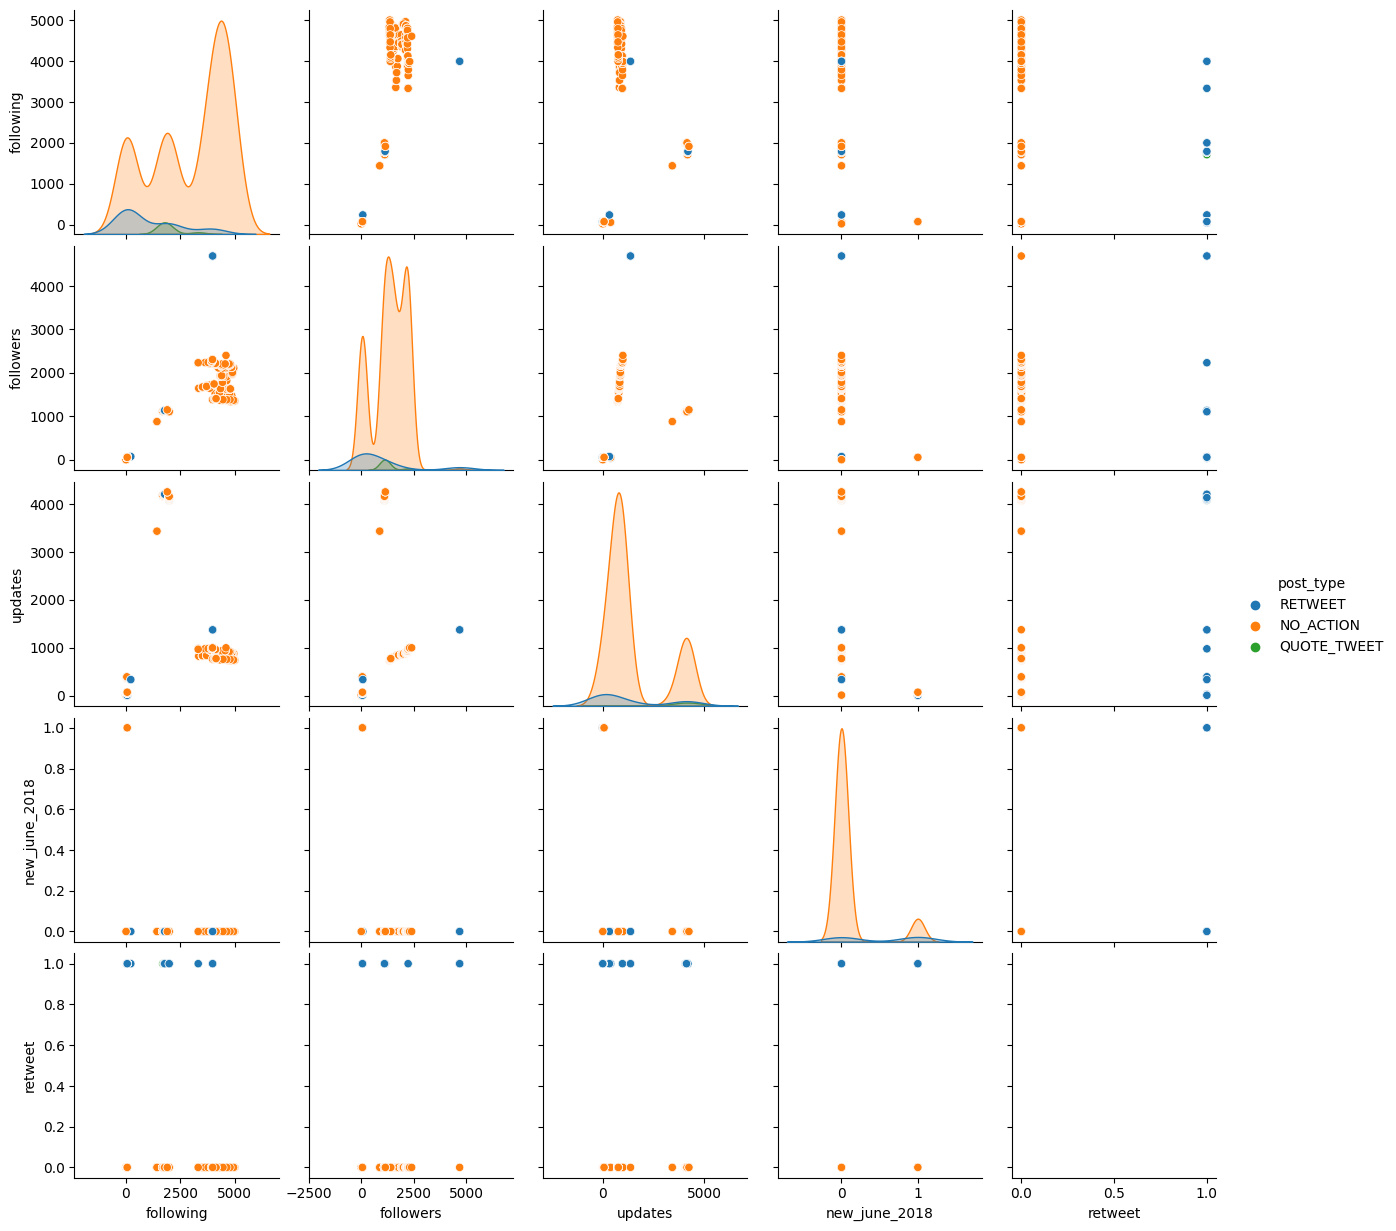

In [ ]:
# pairplot to observe relation between data attributes
sns.pairplot(df.iloc[0:int(df.shape[0]/4000),:], hue="post_type", data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6fd9b19710>,
      dtype=object)

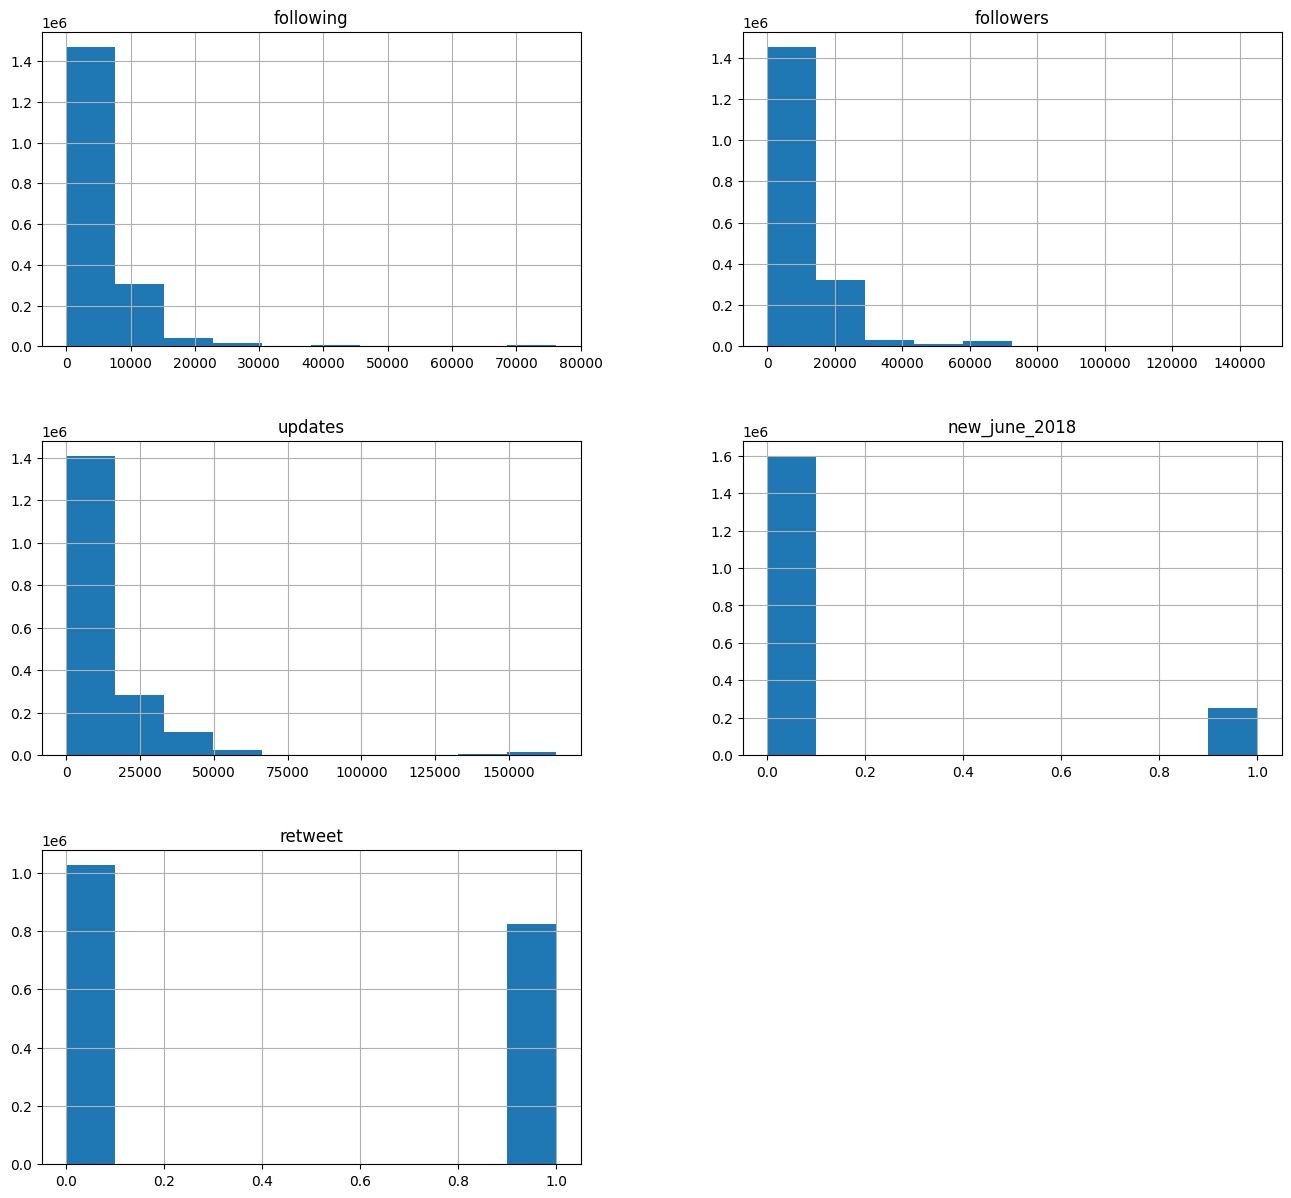

In [ ]:
#histogram of data df
df.hist(figsize=(16,15), bins=10)

**Categorical Feature Exploration**

Text(0.5, 1.0, 'Countplot of Tweets')

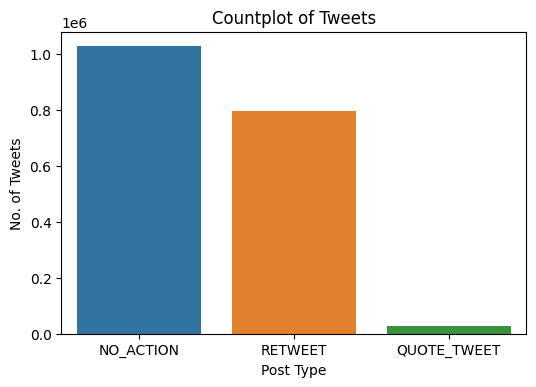

In [ ]:
ax = sns.countplot(df['post_type'], order=df['post_type'].value_counts().index)
ax.set(xlabel = 'Post Type' , ylabel='No. of Tweets')
plt.title("Countplot of Tweets")

Text(0.5, 1.0, 'Counting Different Tweets')

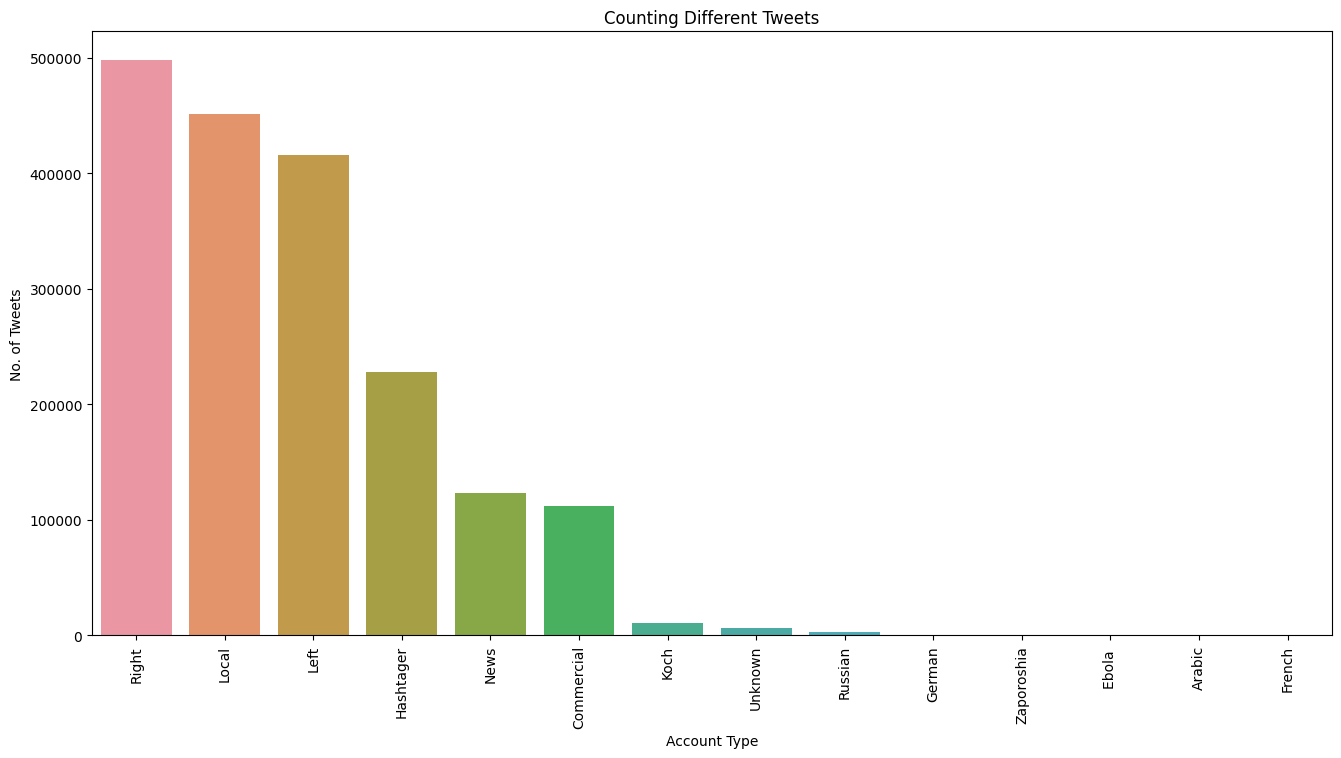

In [ ]:
plt.figure(figsize=(16,8))
ax = sns.countplot(df['account_type'], order=df['account_type'].value_counts().index)
ax.set(xlabel = 'Account Type' , ylabel='No. of Tweets')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Counting Different Tweets")

Text(0.5, 1.0, 'Tweets from Account category')

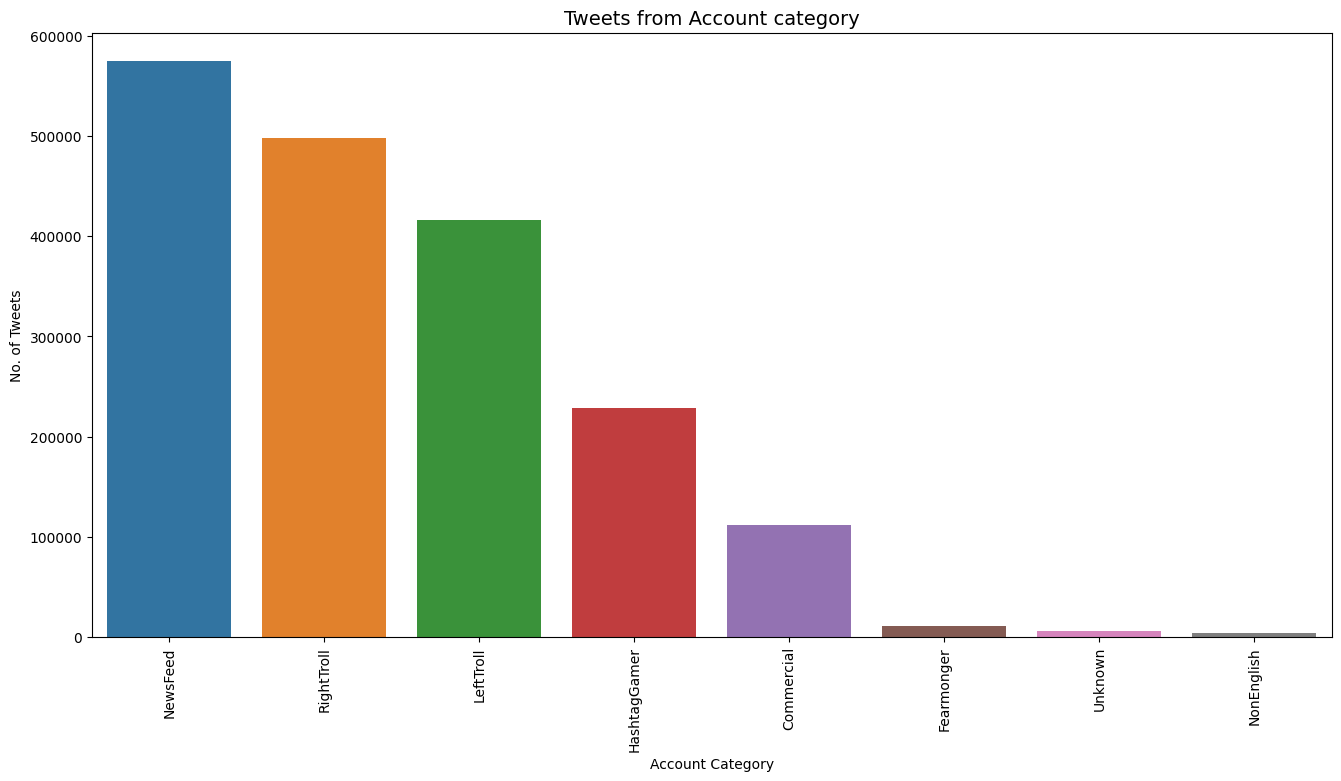

In [ ]:
# countplot of tweets from account_category attribute
plt.figure(figsize=(16,8))
ax = sns.countplot(df['account_category'], order=df['account_category'].value_counts().index)
ax.set(xlabel = 'Account Category' , ylabel='No. of Tweets')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Tweets from Account category", fontsize=14)

Followers and Following Exploration

Text(0, 0.5, 'Number of Following')

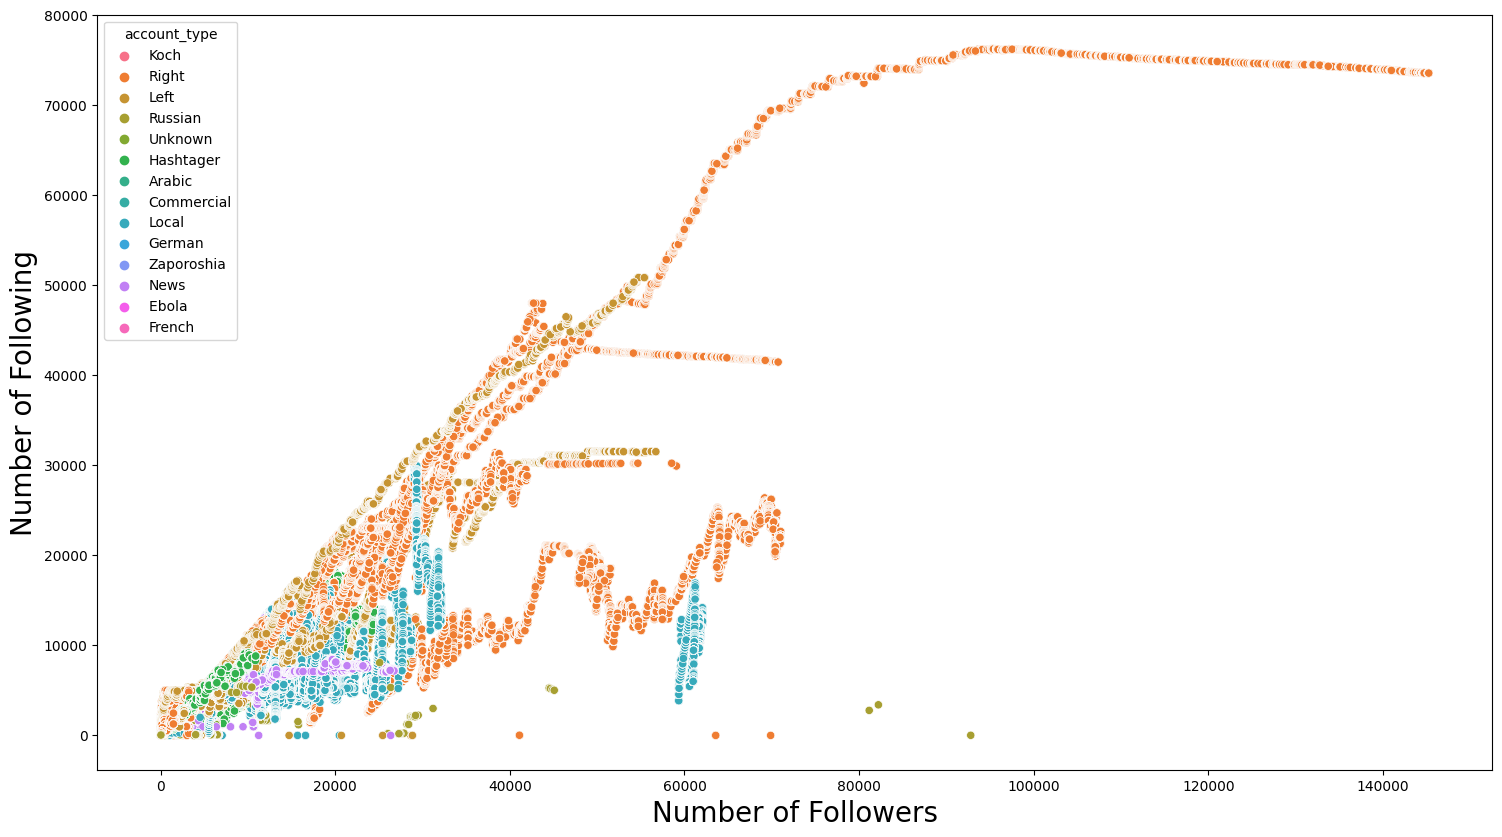

In [ ]:
plt.figure(figsize=(18,10))
ax = sns.scatterplot(x='followers', y='following',hue='account_type' ,data=df)
plt.xlabel('Number of Followers', fontsize = 20)
plt.ylabel('Number of Following', fontsize = 20)

Text(0, 0.5, 'Number of Following')

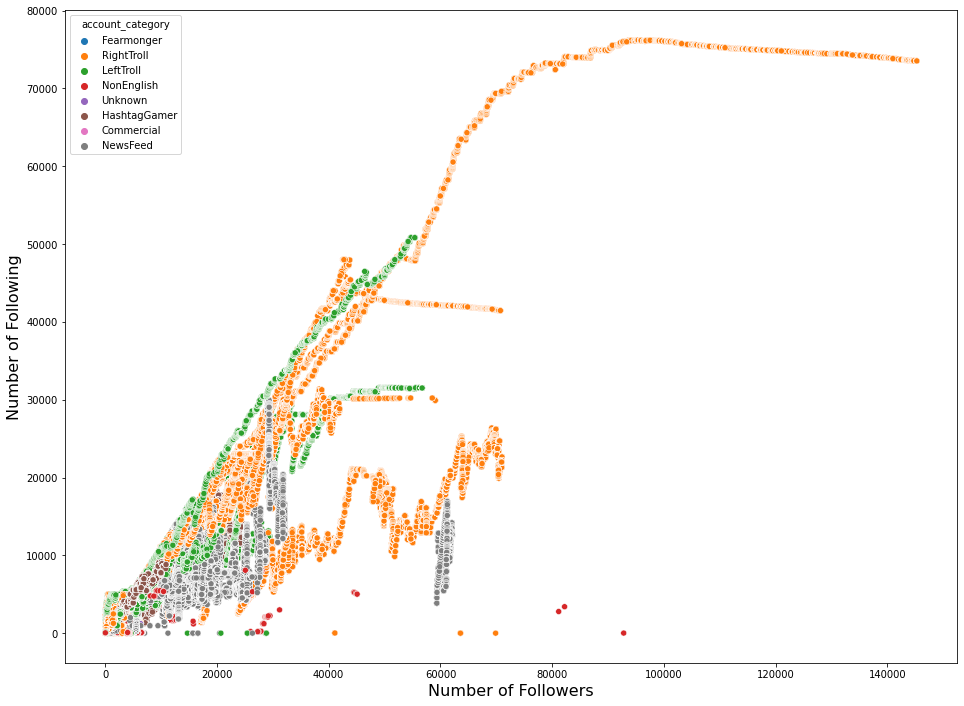

In [ ]:
plt.figure(figsize=(16,12))
ax = sns.scatterplot(x='followers', y='following',hue='account_category' ,data=df)
plt.xlabel('Number of Followers',fontsize=16)
plt.ylabel('Number of Following',fontsize=16)

Text(0, 0.5, 'Number of Following')

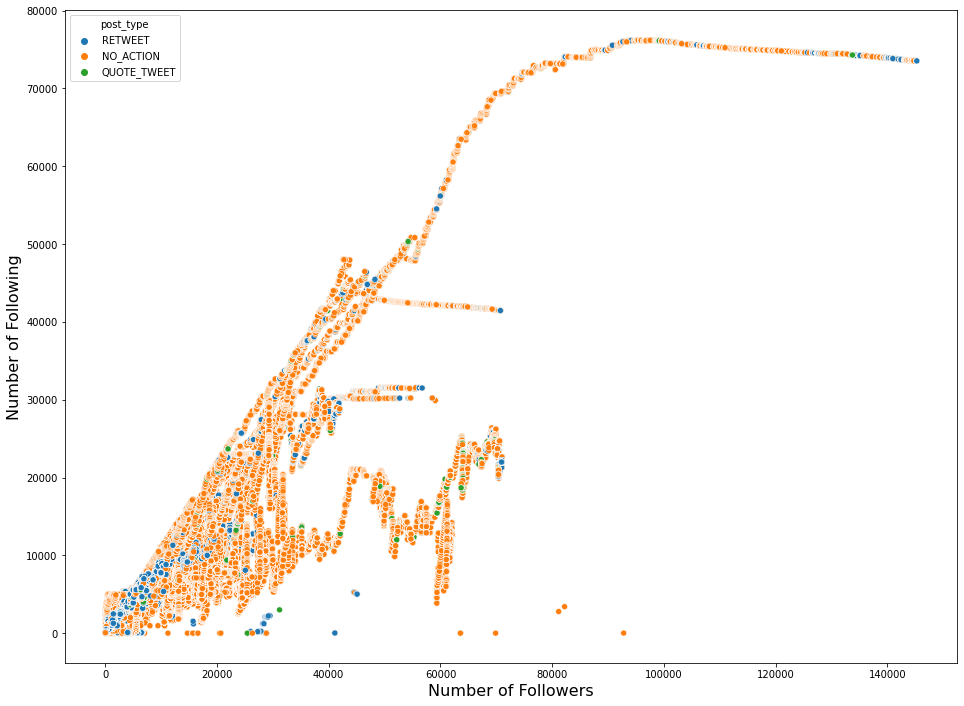

In [ ]:
plt.figure(figsize=(16,12))
ax = sns.scatterplot(x='followers', y='following',hue='post_type' ,data=df)
plt.xlabel('Number of Followers', fontsize = 16)
plt.ylabel('Number of Following', fontsize = 16)

Publish Date Exploration

Text(0, 0.5, 'Tweet Count')

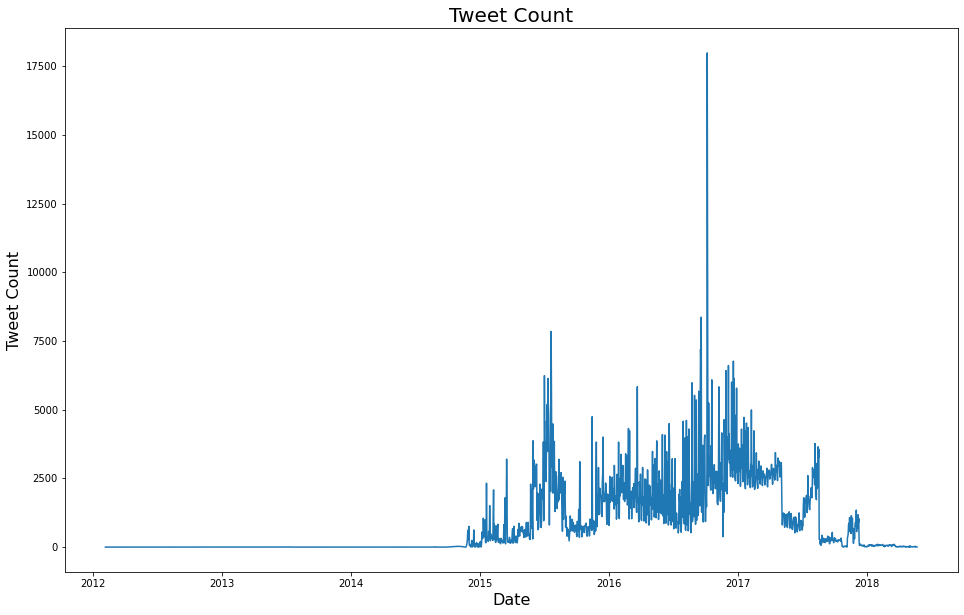

In [ ]:
ax = df['publish_date'].value_counts()
ax.plot(linestyle = "-", figsize = (16,10))
plt.title("Tweet Count", fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Tweet Count', fontsize=16)

### Tokenization Tweets

In [ ]:
df.head()

,author,content,publish_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
425,1D_NICOLE_,#FoodPoisoning is not a joke! #Walmart #KochFa...,2015-11-26,48,40,394,RETWEET,Koch,0,1,Fearmonger
426,1D_NICOLE_,Thanks God that #turkey i ate few days ago was...,2015-11-26,48,40,395,RETWEET,Koch,0,1,Fearmonger
428,1D_NICOLE_,"who's got the worst make up ever, don't tell m...",2015-05-25,59,51,352,NO_ACTION,Koch,0,0,Fearmonger
429,1D_NICOLE_,"I hurt easy, I just don't show it. You can hur...",2015-05-25,59,51,354,NO_ACTION,Koch,0,0,Fearmonger
430,1D_NICOLE_,« The young are permanently in a state resembl...,2015-05-25,59,51,356,NO_ACTION,Koch,0,0,Fearmonger


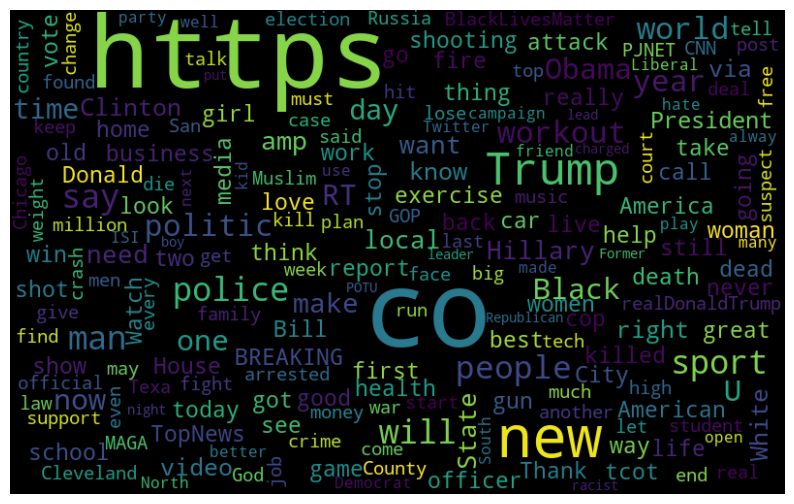

In [ ]:
from wordcloud import WordCloud, STOPWORDS
all_words = ' '.join(df['content'])

wordcloud = WordCloud(stopwords=STOPWORDS,width=800,height=500,
                      max_font_size=110, collocations=False).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [27]:
# Cleaning the content Stuff
df['content'] = df['content'].str.replace(r'http\S+', "")
df['content'] = df['content'].str.replace(r"http", "")
df['content'] = df['content'].str.replace(r"@\S+", "")
df['content'] = df['content'].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
df['content'] = df['content'].str.replace(r"@", "at")
df['content'] = df['content'].str.lower()
df.head()

,author,content,publish_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
425,1D_NICOLE_,foodpoisoning is not a joke! walmart kochfa...,2015-11-26,48,40,394,RETWEET,Koch,0,1,Fearmonger
426,1D_NICOLE_,thanks god that turkey i ate few days ago was...,2015-11-26,48,40,395,RETWEET,Koch,0,1,Fearmonger
428,1D_NICOLE_,"who's got the worst make up ever, don't tell m...",2015-05-25,59,51,352,NO_ACTION,Koch,0,0,Fearmonger
429,1D_NICOLE_,"i hurt easy, i just don't show it you can hur...",2015-05-25,59,51,354,NO_ACTION,Koch,0,0,Fearmonger
430,1D_NICOLE_,the young are permanently in a state resembl...,2015-05-25,59,51,356,NO_ACTION,Koch,0,0,Fearmonger


In [28]:
df.shape

(1849686, 11)

In [29]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/purvit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
import string
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english') + list(string.punctuation)
stopwords_list += ["''", '""', '...', '``']

In [29]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [31]:
import itertools
from nltk import word_tokenize, FreqDist
def process_content(data):
    tokens= word_tokenize(data)
    stopwords_removed = [token for token in tokens if token not in stopwords_list]
    return stopwords_removed   

df['tokens'] = df['content'].apply(process_content)
df['text'] = df['tokens'].apply(' '.join)

In [32]:
#Further clean/check
df = df.reset_index()
df.drop(['content'], axis=1, inplace=True)
df.head()

,index,author,publish_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category,tokens,text
0,425,1D_NICOLE_,2015-11-26,48,40,394,RETWEET,Koch,0,1,Fearmonger,"[foodpoisoning, joke, walmart, kochfarms]",foodpoisoning joke walmart kochfarms
1,426,1D_NICOLE_,2015-11-26,48,40,395,RETWEET,Koch,0,1,Fearmonger,"[thanks, god, turkey, ate, days, ago, good, ko...",thanks god turkey ate days ago good kochfarms
2,428,1D_NICOLE_,2015-05-25,59,51,352,NO_ACTION,Koch,0,0,Fearmonger,"['s, got, worst, make, ever, n't, tell, mirror]",'s got worst make ever n't tell mirror
3,429,1D_NICOLE_,2015-05-25,59,51,354,NO_ACTION,Koch,0,0,Fearmonger,"[hurt, easy, n't, show, hurt, someone, even, k...",hurt easy n't show hurt someone even know
4,430,1D_NICOLE_,2015-05-25,59,51,356,NO_ACTION,Koch,0,0,Fearmonger,"[young, permanently, state, resembling, intoxi...",young permanently state resembling intoxicatio...


In [33]:
## review tokens in more detail
word_tot = [word for tokens in df['tokens'] for word in tokens]
word_unique = set(word_tot)
tweet_len = [len(tokens) for tokens in df['tokens']]

print('{} total words with a vocabulary size of {}'.format(len(word_tot), len(word_unique)))
print('Maximum sentence length is {}'.format(max(tweet_len)))

14946646 total words with a vocabulary size of 264331
Maximum sentence length is 62


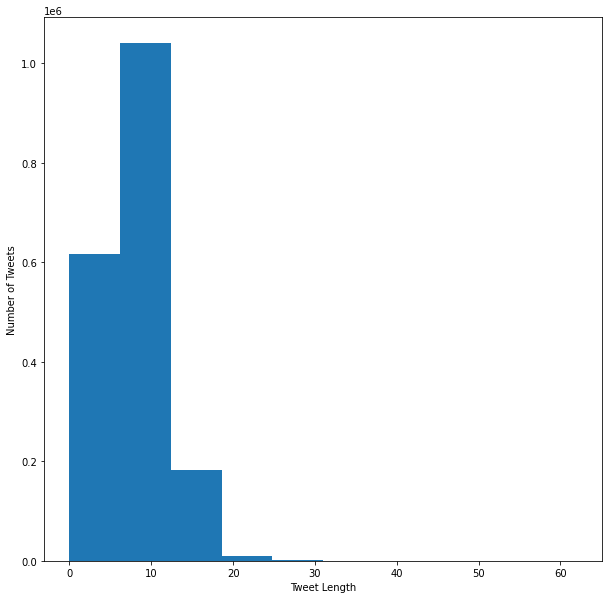

In [33]:
#Look at histogram of tweet lengths
fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Tweet Length')
plt.ylabel('Number of Tweets')
plt.hist(tweet_len)
plt.show()

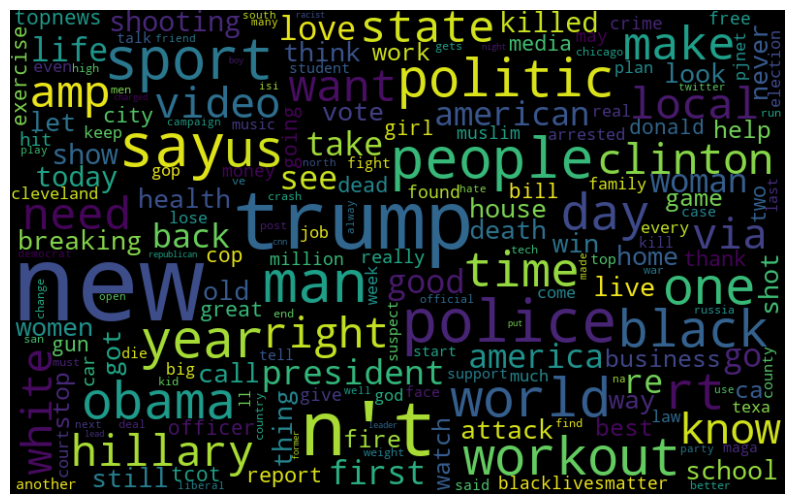

In [ ]:
# join tweets to a single string
all_words = ' '.join(df['text'])

wordcloud = WordCloud(stopwords=STOPWORDS,width=800,height=500,
                      max_font_size=110, collocations=False).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Looking at all the data the russian trolls mostly used the following words to target users:

“Trump”,“New”, and “n’t”
I will look at this split by account categories and publish date in more detail below

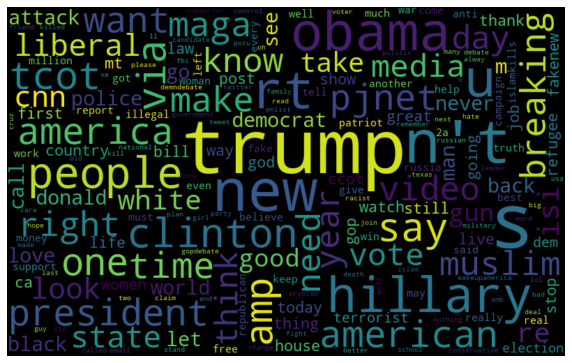

In [ ]:
# join tweets to a single string - Right Trolls
df_right = df.loc[df.account_category == "RightTroll"]
right_words = ' '.join(df_right['text'])

wordcloud = WordCloud(stopwords=STOPWORDS,width=800,height=500,
                      max_font_size=110, collocations=False).generate(right_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Right Trolls mostly used the following words to target users:

“Trump”, “Hillary”, “Obama”, “New”, "People" and “n’t”.<br>
It appears that right trolls focused on Obama and Hillary in their tweets more than Left Trolls did (see below)

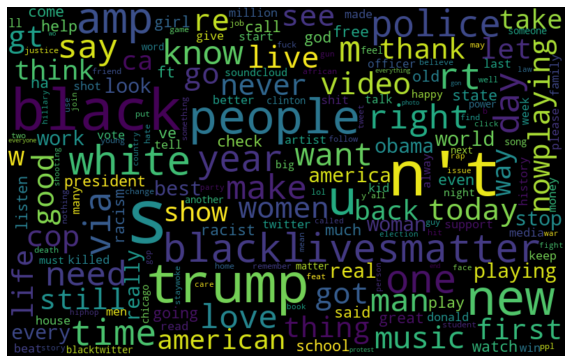

In [ ]:
# join tweets to a single string - Left Trolls
df_left = df.loc[df.account_category == "LeftTroll"]
left_words = ' '.join(df_left['text'])

wordcloud = WordCloud(stopwords=STOPWORDS,width=800,height=500,
                      max_font_size=110, collocations=False).generate(left_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Left Trolls mostly used the following words to target users:

“Trump”, “Black”, “White”, “New”, "People" and “n’t”<br>
It appears that race played a large role for them with the hashtage #blacklivesmatter also largely used

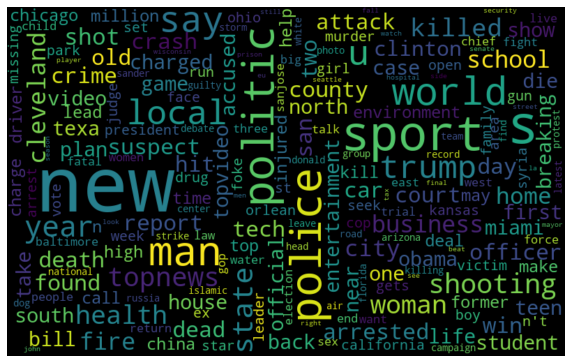

In [ ]:
# join tweets to a single string - News Feed
df_news = df.loc[df.account_category == "NewsFeed"]
news_words = ' '.join(df_news['text'])

wordcloud = WordCloud(stopwords=STOPWORDS,width=800,height=500,
                      max_font_size=110, collocations=False).generate(news_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

News Feed mostly used the following words to target users:

“Sport”, “Politic”, “Police”, “New”, "World", and “Man”<br>
These are common words we hear on the news, which makes sense the News Feed category uses them to target audiences

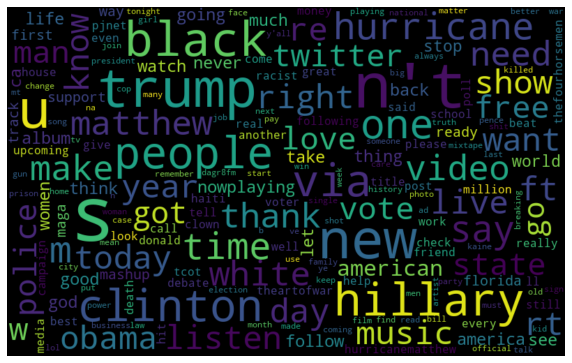

In [ ]:
# join tweets to a single string - 10/6/2016 large spike in tweets
df_2016_10_06 = df.loc[df['publish_date'] == pd.to_datetime('2016-10-06')]
df_100616_words = ' '.join(df_2016_10_06['text'])

wordcloud = WordCloud(stopwords=STOPWORDS,width=800,height=500,
                      max_font_size=110, collocations=False).generate(df_100616_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

There was a huge spike in tweets on October 6, 2016, they day before October 7, 2016. On October 7, 2016, 30 minutes after the Access Hollywood tape was first published where Trump spoke crudely about groping women, WikiLeaks began publishing thousands of emails from Podesta's Gmail account. The most popular tweets from trolls on this day used the words below to target users:

"Trump", "Hillary", "Black", "New", "People" and "n't"<br>
There are additional tweets on Hurricane Matthew as well

In [34]:
#Update dataframe for modeling
clean_data = df.drop(['index','author', 'publish_date', 
                      'following', 'followers', 'updates', 'account_type', 
                      'new_june_2018', 'retweet', 'post_type'], axis=1)
clean_data.head()

,account_category,tokens,text
0,Fearmonger,"[foodpoisoning, joke, walmart, kochfarms]",foodpoisoning joke walmart kochfarms
1,Fearmonger,"[thanks, god, turkey, ate, days, ago, good, ko...",thanks god turkey ate days ago good kochfarms
2,Fearmonger,"['s, got, worst, make, ever, n't, tell, mirror]",'s got worst make ever n't tell mirror
3,Fearmonger,"[hurt, easy, n't, show, hurt, someone, even, k...",hurt easy n't show hurt someone even know
4,Fearmonger,"[young, permanently, state, resembling, intoxi...",young permanently state resembling intoxicatio...


In [35]:
print(len(clean_data))

1849686


In [36]:
clean_data.account_category.value_counts(normalize=True)

NewsFeed        0.310698
RightTroll      0.269205
LeftTroll       0.225040
HashtagGamer    0.123320
Commercial      0.060578
Fearmonger      0.005903
Unknown         0.003333
NonEnglish      0.001922
Name: account_category, dtype: float64

When modeling the data I've decided to combine HashtagGamer, Commercial, Fearmonger, Unknown and NonEnglish into 'Other' since they haven't been prominant in the exploratory phase when looking at the number of followers/following or the largest tweet dates (publish_dates).

In [37]:
#renaming account_categories
clean_data['account_category'].replace({'HashtagGamer': 'Other','NonEnglish': 'Other', 'Unknown': 'Other', 
                            'Fearmonger': 'Other', 'Commercial': 'Other'}, inplace = True)
print(clean_data.shape)
clean_data.account_category.value_counts(normalize=True)

(1849686, 3)


NewsFeed      0.310698
RightTroll    0.269205
LeftTroll     0.225040
Other         0.195057
Name: account_category, dtype: float64

Now that I have the final data for analysis, on to feature engineering and modeling!

### Feature Engineering & Modeling

#### Word2Vec

I will use Word2Vec as my vectorization strategy here because of the large size of my data. Word2vec is a model that was pre-trained on a very large corpus, and provides embeddings that map words that are similar or close to each other.

First I'll develop my train/validate/test data sets for modeling

In [38]:
#Define X and y
from sklearn.model_selection import train_test_split
X = np.array(clean_data.tokens)
y = np.array(clean_data.account_category)

#Create Train/Validate/Test data splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, random_state=40)

Before feeding my lists of tokens into the word2vec model, I need to turn them into LabeledSentence objects below

In [39]:
import gensim
from gensim.models.word2vec import Word2Vec 
from tqdm import tqdm

#labelize tweets
LabeledSentence = gensim.models.doc2vec.LabeledSentence
tqdm.pandas(desc="progress-bar") #estimate time to completion

#return labelized tweets
def labelizeTweets(tweets, label_type):
    labelized = []
    for i,v in tqdm(enumerate(tweets)):
        label = '%s_%s'%(label_type,i)
        labelized.append(LabeledSentence(v, [label]))
    return labelized

#split labelized tweets by train/test/split data
X_train = labelizeTweets(X_train, 'TRAIN')
X_val = labelizeTweets(X_val, 'VALIDATE')
X_test = labelizeTweets(X_test, 'TEST')

1183798it [00:11, 99134.76it/s] 
295950it [00:01, 218152.30it/s]
369938it [00:03, 96179.48it/s] 


In [40]:
X_train[0]

LabeledSentence(words=['2', 'shot', '10', 'minute', 'span', 'detroit', "'s", 'west', 'side'], tags=['TRAIN_0'])

In [41]:
#Build the Word2Vec Model
tweet_w2v = Word2Vec(size=200, window = 5, min_count=10, workers=4) #initialize model
tweet_w2v.build_vocab([x.words for x in tqdm(X_train)]) #create vocabulary
tweet_w2v.train([x.words for x in tqdm(X_train)], total_examples=tweet_w2v.corpus_count, epochs=2)

100%|██████████| 1183798/1183798 [00:00<00:00, 1608040.80it/s]


(17899161, 19134258)

In [42]:
#Check that the Word2Vec code worked correctly 
tweet_w2v['happy']

array([ 1.1255837e-01, -1.2442218e-01,  3.9832208e-01, -8.3684117e-01,
        1.0505636e+00,  1.9630785e-01, -6.5555878e-02, -1.6043699e-01,
       -7.6365882e-01, -2.7937913e-01, -1.6817986e+00,  2.8083029e-01,
       -6.9690061e-01,  3.7081608e-01,  4.8249078e-01,  1.1373079e+00,
       -1.8806107e+00,  3.2378502e-02,  4.1175419e-01, -4.7312135e-01,
        2.1769719e-02,  6.0113424e-01, -9.1969353e-01, -8.3860022e-01,
        8.8276851e-01,  6.5681231e-01, -1.4155520e+00,  1.8840617e+00,
       -5.8386487e-01, -6.0575730e-01, -1.0398991e+00,  5.1096308e-01,
        9.3966335e-01, -6.8984830e-01, -1.7750685e-01,  3.6055860e-01,
        1.4503051e-01,  4.4878319e-01,  1.1238927e+00, -5.8934939e-01,
       -6.8891603e-01, -1.7470658e-01, -1.4473973e-01,  1.3247749e+00,
        2.4264042e-01, -9.3106732e-02, -4.4970796e-02,  8.3414906e-01,
        5.5054945e-01, -5.4410529e-01, -9.4628084e-01, -6.8251979e-01,
       -6.5095776e-01,  1.5272209e-01, -1.9928659e+00, -7.0334172e-01,
      

The code should have produced a vector that is 200 in size (typical size that you want is 100-300 so this is nicely in the middle), which looks to be true above! Now I'll look to see what the most similar words are to the word 'happy' as a test below:

In [43]:
#example producing the most similar words
tweet_w2v.most_similar('happy')

[('wishes', 0.7529586553573608),
 ('wonderful', 0.7451082468032837),
 ('blessed', 0.7267489433288574),
 ('wishing', 0.7261475324630737),
 ('thankful', 0.7252556681632996),
 ('celebrating', 0.6931374073028564),
 ('grateful', 0.6833664178848267),
 ('blessing', 0.6754095554351807),
 ('enjoying', 0.6703123450279236),
 ('celebrate', 0.6678503751754761)]

How cool! For the word 'happy' the model is producing similar words within the same context. These words have a probability to be closer to the word 'happy' in most tweet. Now let's visualize results using the bokeh library for interactive visualization and tsne for converting the vectors to 2D vectors

In [44]:
# import bokeh.plotting as bp
# from bokeh.models import HoverTool, BoxSelectTool
# from bokeh.plotting import figure, show, output_notebook

# # defining the chart
# output_notebook()
# plot_tfidf = bp.figure(plot_width=700, plot_height=600, title="A map of 10000 word vectors",
#     tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
#     x_axis_type=None, y_axis_type=None, min_border=1)

# # getting a list of word vectors. limit to 10,000. each is of 200 dimensions
# word_vectors = [tweet_w2v[w] for w in list(tweet_w2v.wv.vocab.keys())[:5000]]

# # dimensionality reduction. converting the vectors to 2d vectors
# tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
# tsne_w2v = tsne_model.fit_transform(word_vectors)

# # putting everything in a dataframe
# tsne_df = pd.DataFrame(tsne_w2v, columns=['x', 'y'])
# tsne_df['words'] = list(tweet_w2v.wv.vocab.keys())[:5000]

# # plotting the corresponding word appears when you hover on the data point.
# plot_tfidf.scatter(x='x', y='y', source=tsne_df)
# hover = plot_tfidf.select(dict(type=HoverTool))
# hover.tooltips={"word": "@words"}
# show(plot_tfidf)

In [45]:
pip install bokeh

### Train/Validate/Split Data for Modeling

In order to classify the tweets, I'll need to turn them into vectors. I know the vector representation of each word within a tweet so I'll have to combine the vectors to get a new vector that represents the whole tweet. I've looked at different methods and it appears the best solution is to compute a weighted average, the weight being the tf-idf score. The weight will provide the importance of the word with respect to the entire corpus.

In [44]:
# Create tf-idf matrix
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer=lambda x: x, min_df=10)
matrix = vectorizer.fit_transform([x.words for x in X_train])
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
print('vocab size :', len(tfidf))

vocab size : 38607


Produce averaged tweet vector

In [45]:
#Build the vector producing averaged tweets
def buildWordVector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += tweet_w2v[word].reshape((1, size)) * tfidf[word]
            count += 1.
        except KeyError: # handling the case where the token is not
                         # in the corpus. useful for testing.
            continue
    if count != 0:
        vec /= count
    return vec

Convert X_train, X_val and X_test into list of vectors. Scale each column to have zero mean and unit standard deviation.

In [46]:
from sklearn.preprocessing import scale

#Convert into vector and scale
train_vecs_w2v = np.concatenate([buildWordVector(z, 200) for z in tqdm(map(lambda x: x.words, X_train))])
train_vecs_w2v = scale(train_vecs_w2v)

val_vecs_w2v = np.concatenate([buildWordVector(z, 200) for z in tqdm(map(lambda x: x.words, X_val))])
val_vecs_w2v = scale(val_vecs_w2v)

test_vecs_w2v = np.concatenate([buildWordVector(z, 200) for z in tqdm(map(lambda x: x.words, X_test))])
test_vecs_w2v = scale(test_vecs_w2v)

1183798it [03:37, 5447.24it/s]
295950it [00:54, 5386.26it/s]
369938it [01:07, 5445.82it/s]


# Model Selection

### Random Forest Classifier 

The first model I'll try before diving into Neural Networks is to see how a simple random forest classifier will work on my data

In [57]:
from sklearn.svm import SVC
classifier = SVC(verbose=True)

In [ ]:
#Fitting a Random Forest Classifier
classifier.fit(train_vecs_w2v, y_train)

[LibSVM]

In [50]:
y_pred_rf = classifier.predict(val_vecs_w2v)

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [53]:

accuracy, precision, recall, f1 = get_metrics(y_val, y_pred_rf)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, 
                                                                       recall, f1))

accuracy = 0.703, precision = 0.698, recall = 0.703, f1 = 0.699


[[34881  7362  7465 16528]
 [ 3664 81186  1945  5500]
 [ 7968  2710 40136  6949]
 [11996  9932  5904 51824]]


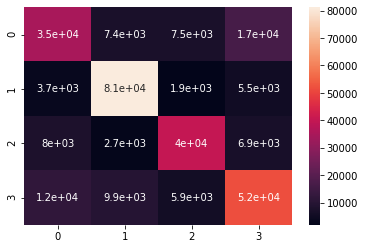

In [54]:
#Plot confusion matrix for random forest model
class_names = list(set(y))
cm = confusion_matrix(y_val, y_pred_rf)
sns.heatmap(data=cm, annot=True)
print(cm)

In [55]:
report = classification_report(y_val, y_pred_rf)

In [56]:
# LOgistic regression
print(report)

              precision    recall  f1-score   support

   LeftTroll       0.60      0.53      0.56     66236
    NewsFeed       0.80      0.88      0.84     92295
       Other       0.72      0.69      0.71     57763
  RightTroll       0.64      0.65      0.65     79656

    accuracy                           0.70    295950
   macro avg       0.69      0.69      0.69    295950
weighted avg       0.70      0.70      0.70    295950



### SVM Classifier

In [48]:
from sklearn.svm import SVC
classifier2 = SVC(kernel="rbf", verbose=True)

In [ ]:
classifier2.fit(train_vecs_w2v, y_train)

[LibSVM]

In [ ]:
y_pred = classifier2.predict(val_vecs_w2v)